In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
path ="/content/drive/MyDrive/Pythonclass/Dataset/statecrime.csv"

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.sample(5)

,state,violent,murder,hs_grad,poverty,single,white,urban
20,Maryland,590.0,7.7,88.2,9.1,27.3,60.2,83.53
6,Connecticut,300.5,3.0,88.6,9.4,25.0,79.1,84.83
8,District of Columbia,1348.9,24.2,87.1,18.4,48.0,38.7,100.00
40,South Carolina,675.1,6.7,83.6,17.1,28.4,67.6,55.78
50,Wyoming,219.3,2.0,91.8,9.8,18.9,91.3,24.51


In [ ]:
data.head()

,state,violent,murder,hs_grad,poverty,single,white,urban
0,Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
1,Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
2,Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
3,Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
4,California,473.4,5.4,80.6,14.2,27.8,62.7,89.73


In [ ]:
data.tail()

,state,violent,murder,hs_grad,poverty,single,white,urban
46,Virginia,230.0,4.7,86.6,10.5,24.0,70.4,69.79
47,Washington,338.3,2.8,89.7,12.3,22.2,80.2,74.97
48,West Virginia,331.2,4.9,82.8,17.7,23.3,94.3,33.20
49,Wisconsin,259.7,2.6,89.8,12.4,22.2,88.4,55.80
50,Wyoming,219.3,2.0,91.8,9.8,18.9,91.3,24.51


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    51 non-null     object 
 1   violent  51 non-null     float64
 2   murder   51 non-null     float64
 3   hs_grad  51 non-null     float64
 4   poverty  51 non-null     float64
 5   single   51 non-null     float64
 6   white    51 non-null     float64
 7   urban    51 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [ ]:
data.shape

(51, 8)

In [ ]:
data.columns

Index(['state', 'violent', 'murder', 'hs_grad', 'poverty', 'single', 'white',
       'urban'],
      dtype='object')

In [ ]:
data.describe()

,violent,murder,hs_grad,poverty,single,white,urban
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,411.482353,4.900000,86.878431,13.854902,25.186275,77.968627,60.670196
std,208.017447,3.646094,3.377769,3.110583,4.786565,13.553029,20.802432
min,119.900000,0.900000,79.900000,8.500000,17.900000,26.900000,17.380000
25%,263.350000,2.650000,84.050000,11.500000,22.100000,70.600000,46.565000
50%,366.400000,4.700000,87.400000,14.200000,25.500000,80.000000,59.170000
75%,507.400000,6.150000,89.800000,16.400000,27.300000,87.750000,78.415000
max,1348.900000,24.200000,91.800000,21.900000,48.000000,95.800000,100.000000


In [ ]:
data.isna().any()

state      False
violent    False
murder     False
hs_grad    False
poverty    False
single     False
white      False
urban      False
dtype: bool

In [ ]:
data.isnull().any()

state      False
violent    False
murder     False
hs_grad    False
poverty    False
single     False
white      False
urban      False
dtype: bool

In [ ]:
data.duplicated().any()

False

In [ ]:
data_new =data[['violent', 'murder', 'hs_grad', 'poverty', 'single', 'white','urban']]

<Axes: >

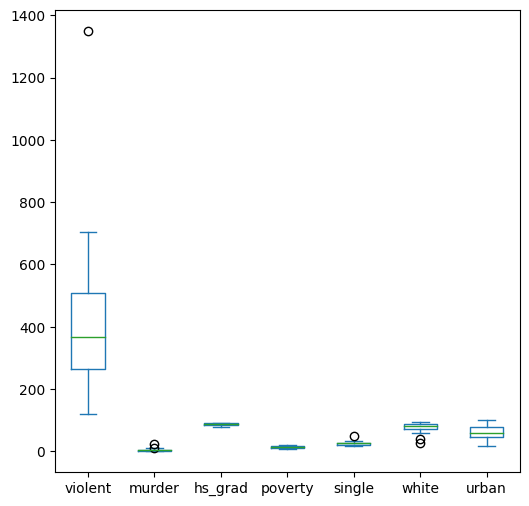

In [ ]:
data_new.plot.box(figsize=(6,6))

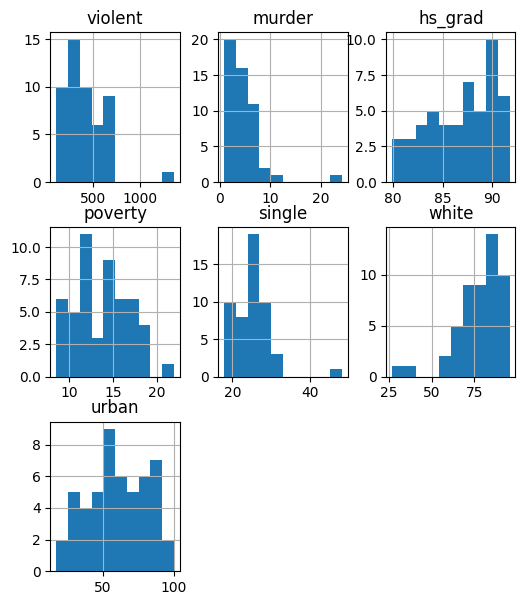

In [ ]:
data_new.hist(figsize=(6,7));

In [ ]:
corr = data_new.corr()

In [ ]:
corr

,violent,murder,hs_grad,poverty,single,white,urban
violent,1.000000,0.868000,-0.383188,0.362683,0.808461,-0.577030,0.427892
murder,0.868000,1.000000,-0.457953,0.541799,0.877239,-0.574495,0.297864
hs_grad,-0.383188,-0.457953,1.000000,-0.742564,-0.561402,0.341508,-0.169358
poverty,0.362683,0.541799,-0.742564,1.000000,0.493288,-0.186937,-0.195094
single,0.808461,0.877239,-0.561402,0.493288,1.000000,-0.751743,0.421086
white,-0.577030,-0.574495,0.341508,-0.186937,-0.751743,1.000000,-0.448929
urban,0.427892,0.297864,-0.169358,-0.195094,0.421086,-0.448929,1.000000


<Axes: >

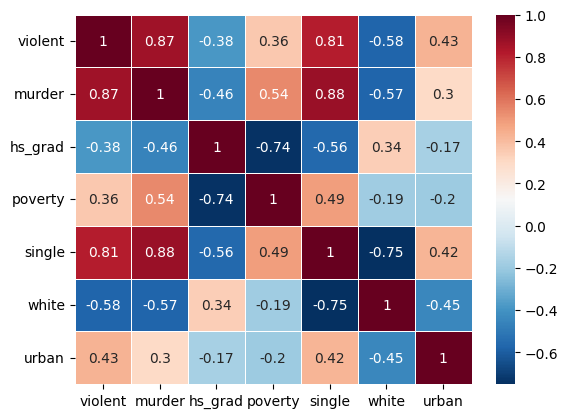

In [ ]:
sns.heatmap(corr, xticklabels= data_new.columns, yticklabels=data_new.columns, cmap = 'RdBu_r',
            annot =True , linewidth = 0.5)

# Run model

hypothesis: higher the poverty, higher the crime

In [ ]:
model1= smf.ols(formula='murder ~ poverty', data=data_new).fit() # oridinal least square

In [ ]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     20.36
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.03e-05
Time:                        20:01:48   Log-Likelihood:                -128.98
No. Observations:                  51   AIC:                             262.0
Df Residuals:                      49   BIC:                             265.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8989      1.998     -1.952      0.0

In [ ]:
#multiple regression
model2=smf.ols(formula='murder ~ poverty+urban', data=data_new).fit() # oridinal least square

In [ ]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     20.68
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           3.33e-07
Time:                        20:08:56   Log-Likelihood:                -121.99
No. Observations:                  51   AIC:                             250.0
Df Residuals:                      48   BIC:                             255.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6894      2.305     -4.203      0.0